#### 1. load data from csv

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

C:\Users\1000259375\AppData\Local\Temp\ipykernel_14732\1029091616.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [3]:
# load data
df = pd.read_csv('datasets/salary_food.csv')
df

,income,food_expenses
0,16,52
1,20,60
2,12,50
3,14,52
4,14,50
5,15,48
6,12,48
7,10,46
8,10,48
9,12,50


#### 2. ตรวจสอบการกระจายของข้อมูลโดยใช้ Scatter plot

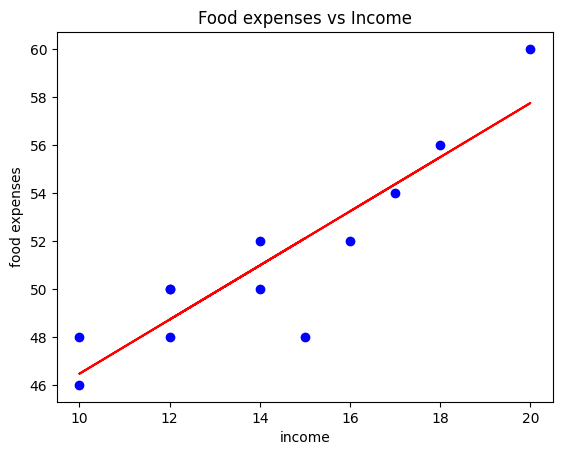

In [7]:
# scatter plot
plt.scatter(df['income'], df['food_expenses'],color='blue')

# find graph slope
m,b = np.polyfit(df['income'],df['food_expenses'], 1)
plt.plot(df['income'],m*df['income']+b,color='red')
plt.title('Food expenses vs Income')
plt.xlabel('income')
plt.ylabel('food expenses')

plt.show()

#### 3. split data into train and test

In [14]:
# x, y for simple linear regression

x = df[['income']] # ตัวแปรอิสระ ==> 2D array
y = df['food_expenses'] # ตัวแปรตาม 1D array

# split data into train and test by manual
x_train = x[:10].values
y_train = y[:10].values

x_test = x[-2:].values
y_test = y[-2:].values

print(x_train)
print(y_train)
print(x_test)
print(y_test)

[[16]
 [20]
 [12]
 [14]
 [14]
 [15]
 [12]
 [10]
 [10]
 [12]]
[52 60 50 52 50 48 48 46 48 50]
[[17]
 [18]]
[54 56]


#### 4. train model by linear regression

In [17]:
# create model object linear regression

model = LinearRegression()

# model training (fit the model)
model.fit(x_train, y_train)

LinearRegression()

#### 5. prediction by using test data

In [18]:
model.predict(x_test)

array([54.3030303 , 55.41818182])

#### 6. Model evaluation

In [19]:
# slope (coefficient, coef_)
print("Coefficient:", model.coef_) # coeeficient #b

Coefficient: [1.11515152]


In [20]:
# intercept, intercept_
print("Intercept:", model.intercept_)

Intercept: 35.345454545454544


In [24]:
# model precision # R-squared 0.1 - 1

print('R-squared:',model.score(x_test, y_test))
print('R-squared %.2f%%' % (model.score(x_test, y_test)*100))

R-squared: 0.7848301193755732
R-squared 78.48%


#### 7. save model (model export)

In [26]:
# install joblib library for model export

! pip install joblib


[notice] A new release of pip is available: 23.2.1 -> 23.3.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [27]:
# save model
from joblib import dump

In [28]:
# save model to model.joblib
dump(model, 'salary_food_model.joblib')

['salary_food_model.joblib']

#### 8. load saved model to use

In [29]:
from joblib import load

In [32]:
# load model from .joblib file
myModel = load('salary_food_model.joblib')

#test model
print("Prediction:", myModel.predict([[17],[18],[30],[60]]))

Prediction: [ 54.3030303   55.41818182  68.8        102.25454545]
